# Linear Regression

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import feature_selection

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

## Goals

- Understand how linear regression fits data and makes predictions
- Be able to interpret a linear regression model
- Build a linear regression model using the sci-kit learn library
- Work together as a class to model the King County housing dataset

## Simple linear regression

Simple linear regression is an approach for predicting a **continuous response** using a **single feature**. It takes the following form:

$y = \beta_0 + \beta_1x$

- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

$\beta_0$ and $\beta_1$ are called the **model coefficients**:

- We must "learn" the values of these coefficients to create our model.
- And once we've learned these coefficients, we can use the model to predict the target variable, $y$.

### Estimating ("learning") model coefficients

- Coefficients are estimated during the model fitting process using the **least squares criterion**.
- We must find the line which minimizes the **sum of squared residuals** (or "sum of squared errors").

![Estimating coefficients](images/estimating_coefficients.png)

In this diagram:

- The black dots are the **observed values** of $x$ and $y$.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

![Slope-intercept](images/slope_intercept.png)

How do the model coefficients relate to the least squares line?

- $\beta_0$ is the **intercept** (the value of $y$ when $x$ = 0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)


Linear Regression is highly **parametric**, meaning that is relies heavily on the underlying shape of the data. If the data fall into a line, then lienar regression will do well. If the data does not fall in line (get it?) linear regression is likely to fail.


Let's use linear regression to model advertising data.

In [2]:
df = pd.read_csv('../../data/advertising-starter.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


What are the observations?

- Each observation represents **one market** (200 markets in the dataset)

What are the features?

- **TV:** advertising dollars spent on TV for a single product (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio (in thousands of dollars)
- **Newspaper:** advertising dollars spent on Newspaper (in thousands of dollars)

What is the response?

- **Sales:** sales of a single product in a given market (in thousands of widgets)

Questions:


1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

In [3]:
# Make all of the column names lowercase
df.columns = df.columns.str.lower()

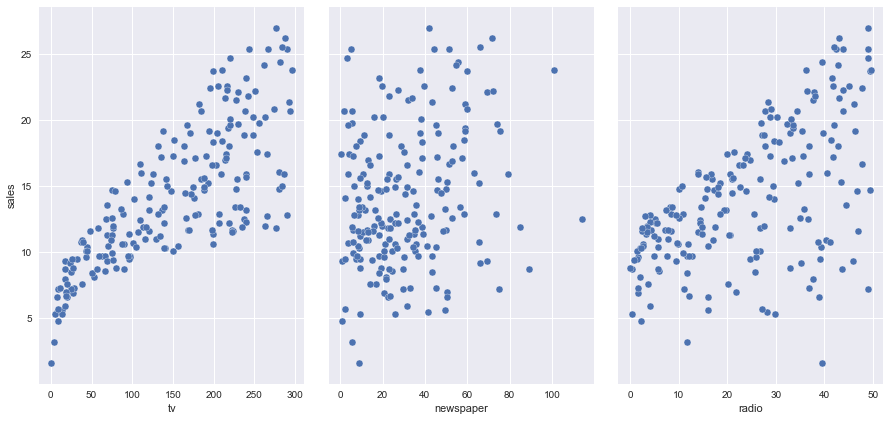

In [4]:
# Create a scatter plot for ad spending vs. sales for every ad type
sns.pairplot(df, x_vars=['tv', 'newspaper', 'radio'], y_vars='sales', size=6, aspect=0.7, kind='scatter')

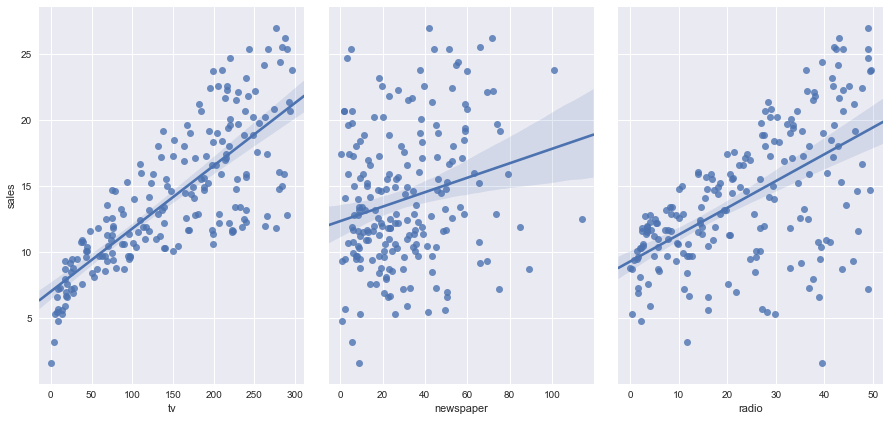

In [5]:
# Include a "regression line"
sns.pairplot(df, x_vars=['tv', 'newspaper', 'radio'], y_vars='sales', size=6, aspect=0.7, kind='reg')

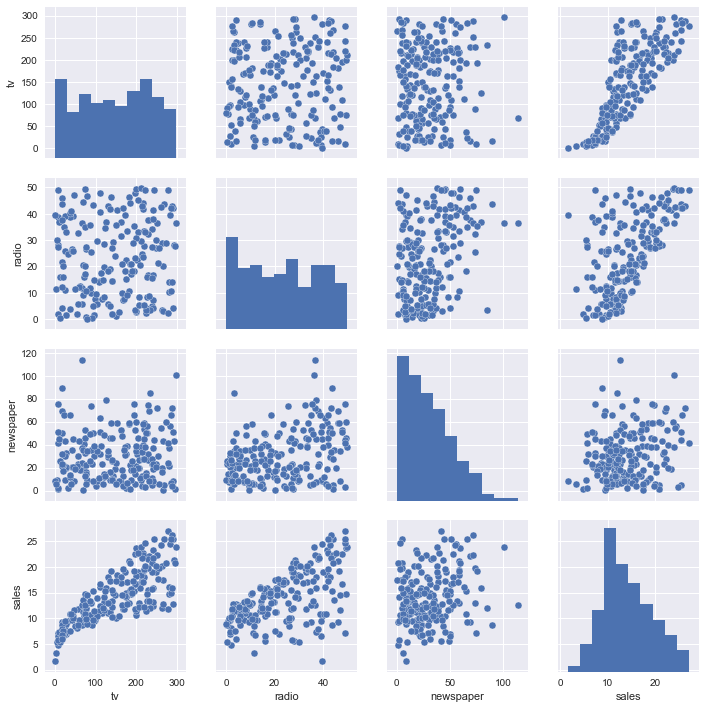

In [6]:
# Visualize the relationships between variables with pairplot
sns.pairplot(df)

In [7]:
# Compute the correlation matrix
df.corr()

,tv,radio,newspaper,sales
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


## Modeling Time!

In [8]:
# Create dataframe for features and a series for target variable
features = ['tv']
target = 'sales'

X = df[features]
y = df[target]

# Initialize and fit the model
linreg = LinearRegression()
linreg.fit(X, y)

# Print the intercept and coefficients
print 'Intercept:', linreg.intercept_
print 'Coefficients:', linreg.coef_

Intercept: 7.03259354913
Coefficients: [ 0.04753664]


### Interpreting Model Coefficients

How do we interpret the TV coefficient ( $\beta_1$ )?

- A "unit" increase in TV ad spending is **associated with** a 0.0475 "unit" increase in Sales.
- Meaning: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.5 widgets.
- **This is not a statement of causation.**

If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.0326 + 0.0475 \times 50$$

In [9]:
# Manually calculate the prediction
7.03259354913 + 0.04753664 * 50

9.409425549129999

In [10]:
# Predict for a new observation using sklearn
linreg.predict(50)

array([ 9.40942557])

Thus, we would predict sales of **9,409 widgets** in that market.

### Does the Scale of the Features Matter?

Let's say that TV was measured in dollars, rather than thousands of dollars. How would that affect the model?

In [11]:
df['tv_dollars'] = df['tv'] * 1000
df.head()

,tv,radio,newspaper,sales,tv_dollars
0,230.1,37.8,69.2,22.1,230100.0
1,44.5,39.3,45.1,10.4,44500.0
2,17.2,45.9,69.3,9.3,17200.0
3,151.5,41.3,58.5,18.5,151500.0
4,180.8,10.8,58.4,12.9,180800.0


In [12]:
# Use sklearn to model data TV_dollars vs sales

features = ['tv_dollars']
target = 'sales'

X = df[features]
y = df[target]

linreg = LinearRegression()
linreg.fit(X, y)

print 'Intercept:', linreg.intercept_
print 'Coefficients:', linreg.coef_

Intercept: 7.03259354913
Coefficients: [  4.75366404e-05]


In [13]:
# Predict for a new observation
linreg.predict(50000)

array([ 9.40942557])

The scale of the features is **irrelevant** for linear regression models, since it will only affect the scale of the coefficients, and we simply change our interpretation of the coefficients.

Let's use the sklearn model to graph TV versus sales and the predicted TV values vs sales

In [14]:
# Make predictions by passing X into model
features = ['tv']
target = 'sales'

X = df[features]
y = df[target]

linreg.fit(X, y)
y_pred = linreg.predict(X)

# Combine y_pred and y into a dataframe and concat with X
y_df = pd.DataFrame({'prediction': y_pred, 'actual': y})
pred = pd.concat([X, y_df], axis=1)
pred.head()

,tv,actual,prediction
0,230.1,22.1,17.970775
1,44.5,10.4,9.147974
2,17.2,9.3,7.850224
3,151.5,18.5,14.234395
4,180.8,12.9,15.627218


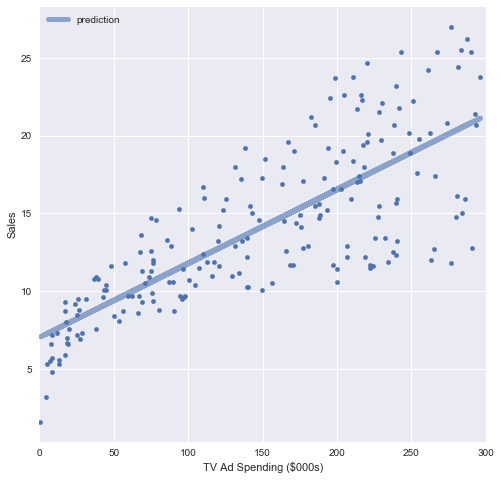

In [15]:
# Make a scatter plot of X and y
ax = pred.plot(x='tv', y='actual', kind='scatter')

# Make a line plot of X and preds
pred.plot(
    x='tv', 
    y='prediction', 
    kind='line', 
    linewidth=5, 
    alpha=0.6, 
    ax=ax, 
    figsize=(8,8)
)

plt.xlim(0, 300)
plt.xlabel('TV Ad Spending ($000s)')
plt.ylabel('Sales')

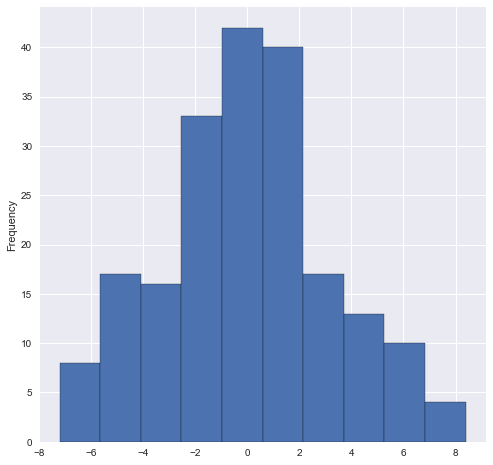

In [16]:
# Plot the residuals
pred['residual'] = pred['prediction'] - pred['actual']
pred['residual'].plot(kind='hist', figsize=(8,8), ec='black', bins=10)

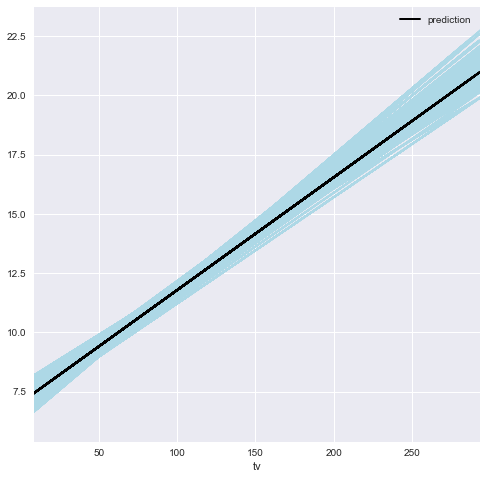

In [17]:
# Let's bootstrap a confidence interval for the model
features = ['tv']
target = 'sales'

linreg = LinearRegression()
ax = plt.gca()

for x in range(100):
    
    sample = df.sample(replace=True, n=df.shape[0])
    
    X = sample[features]
    y = sample[target]
    
    linreg.fit(X, y)
    pd.DataFrame({'x': X['tv'], 'y': linreg.predict(X)}).plot(
        x='x',
        y='y', 
        kind='line', 
        ax=ax, 
        legend=False,
        c='lightblue'
    )

pred.plot(
    x='tv', 
    y='prediction', 
    kind='line',
    c='black',
    linewidth=2, 
    ax=ax, 
    figsize=(8,8)
)

plt.show()

## Bias and Variance

Linear regression is a low variance / high bias model:

- **Low variance:** Under repeated sampling from the underlying population, the line will stay roughly in the same place
- **High bias:** The line will rarely fit the data well

## How well does the model fit the data?

**R-squared:**

- A common way to evaluate the overall fit of a linear model
- Defined as the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model
- Also defined as the reduction in error over the **null model**, which is the model that simply predicts the mean of the observed response
- Between negative infinity and 1
- Higher is better (guessing the average will product an R-squared of 0)

![q](https://i.stack.imgur.com/xb1VY.png)

![s](https://i.stack.imgur.com/8OMsa.png)

In [18]:
# Method 1
linreg.score(X, y)

0.53310736307033646

In [19]:
# Method 2
metrics.r2_score(y, y_pred)

-0.78053575417510168

- The threshold for a **"good" R-squared value** is highly dependent on the particular domain.
- R-squared is more useful as a tool for **comparing models**.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features, which is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

In [20]:
# Create dataframe for features and a series for target variable
features = ['tv', 'radio', 'newspaper']
target = 'sales'

X = df[features]
y = df[target]

# Initialize and fit the model
linreg = LinearRegression()
linreg.fit(X, y)

# Print the intercept and coefficients
print 'Intercept:', linreg.intercept_
print 'Coefficients:', linreg.coef_
print 'R-Squared:', linreg.score(X, y)

Intercept: 2.93888936946
Coefficients: [ 0.04576465  0.18853002 -0.00103749]
R-Squared: 0.897210638179


For a given amount of Radio and Newspaper spending, an increase of $1,000 in **TV** spending is associated with an **increase in sales of 45.8 widgets**.

For a given amount of TV and Newspaper spending, an increase of $1,000 in **Radio** spending is associated with an **increase in Sales of 188.5 widgets**.

For a given amount of TV and Radio spending, an increase of $1,000 in **Newspaper** spending is associated with an **decrease in Sales of 1.0 widgets**.

## Pitfalls of Multiple Linear Regression Models

With mulltiple linear regression, we want the predictor variables to be largely independent of each other, but all of them should help explain the $y$ variable.

**What is Multicollinearity?**

Multicollinearity exists whenever two or more of the predictors in a regression model are moderately or highly correlated. It can cause the following pitfalls:
- the estimated regression coefficient of any one variable depends on which other predictors are included in the model
- the precision of the estimated regression coefficients decreases as more predictors are added to the model
- the marginal contribution of any one predictor variable in reducing the error sum of squares depends on which other predictors are already in the model
- hypothesis tests may yield different conclusions depending on which predictors are in the model

In [21]:
# Let's create another predictor, "tv_viewers", that is highly correlated to tv ad spend
df['tv_viewers'] = df['tv'] * 5000 + np.random.random(size=df.shape[0]) * 500000
df['tv_viewers'] = df['tv_viewers'].apply(round)
df.head()

,tv,radio,newspaper,sales,tv_dollars,tv_viewers
0,230.1,37.8,69.2,22.1,230100.0,1196853.0
1,44.5,39.3,45.1,10.4,44500.0,546158.0
2,17.2,45.9,69.3,9.3,17200.0,141042.0
3,151.5,41.3,58.5,18.5,151500.0,1222635.0
4,180.8,10.8,58.4,12.9,180800.0,1161640.0


In [22]:
# Recompute the correlation matrix
df.corr()

,tv,radio,newspaper,sales,tv_dollars,tv_viewers
tv,1.000000,0.054809,0.056648,0.782224,1.000000,0.947791
radio,0.054809,1.000000,0.354104,0.576223,0.054809,0.046663
newspaper,0.056648,0.354104,1.000000,0.228299,0.056648,0.018300
sales,0.782224,0.576223,0.228299,1.000000,0.782224,0.744440
tv_dollars,1.000000,0.054809,0.056648,0.782224,1.000000,0.947791
tv_viewers,0.947791,0.046663,0.018300,0.744440,0.947791,1.000000


Including both the $tv$ and $tv\_viewers$ fields in a model could introduce a pain point of multicollinearity, where it's more difficult for a model to determine which feature is effecting the predicted value.

In [23]:
features = ['tv', 'radio', 'newspaper', 'tv_viewers']
target = 'sales'

X = df[features]
y = df[target]

linreg = LinearRegression()
linreg.fit(X, y)

print 'Intercept:', linreg.intercept_
print 'Coefficients:', linreg.coef_
print 'R-Squared:', linreg.score(X, y)

Intercept: 2.77453816629
Coefficients: [  4.24667651e-02   1.88364948e-01  -5.11741547e-04   6.52075382e-07]
R-Squared: 0.897538512031


High multicollinearity among predictor variables **does not prevent good predictions of the response** within the scope of the model. If the primary purpose of your regression analysis is to predict a response $y$, you don't have to worry much about multicollinearity.

## Linear Regression Works Best When:

- The data is **normally distributed** (but doesn't have to be)
- The $X$s significantly explain $y$ (have **low p-values**)
- The $X$s are independent of each other (**low multicollinearity**)
- The resulting values passes **linear** assumptions (dependent on problem)

## Pros and Cons

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Sensitive to irrelevant features (scaling won't help but feature selection will)
- Makes improper predictions (lines are not bound on any side)
- Can't automatically learn feature interactions

## Resources

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9
- http://www-bcf.usc.edu/~gareth/ISL/
- http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/
- http://www.dataschool.io/applying-and-interpreting-linear-regression/
- https://www.datarobot.com/blog/ordinary-least-squares-in-python/
- https://www.datarobot.com/blog/multiple-regression-using-statsmodels/
- https://medium.com/@GalarnykMichael/linear-regression-using-python-b29174c3797a#.vczf85s0s
- https://www.youtube.com/watch?v=5-QY6MCt7fo


## Class Exercise

We're going to work together to model housing prices using the king county home sales 

In [24]:
# Load in data
df = pd.read_csv("../../data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
